<a href="https://colab.research.google.com/github/BIRAN/SAS_Visual_Forecasting/blob/master/SARIMA_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ARIMA model

ARIMA is an acronym that stands for AutoRegressive Integrated Moving Average. It is a generalization of the simpler AutoRegressive Moving Average and adds the notion of integration.

*This acronym is descriptive, capturing the key aspects of the model itself. Briefly, they are:*

1.   **AR**: **Autoregression**. A model that uses the dependent relationship between an observation and some number of lagged observations.
2.   **I**: **Integrated**. The use of differencing of raw observations (e.g. subtracting an observation from an observation at the previous time step) in order to make the time series stationary.
3. **MA**: **Moving Average**. A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.


In [0]:
from pandas import read_csv
import pandas as pd
import numpy as np
import time
from scipy.stats import norm
import statsmodels.api as sm
import matplotlib.pyplot as plt
from datetime import datetime
import requests
from io import BytesIO

%matplotlib inline

In [0]:
def parser(x):
    return datetime.strptime(x, '%Y-%m-%d')

url = 'https://raw.githubusercontent.com/BIRAN/SAS_Visual_Forecasting/master/statistical_method/air_date.csv'
series = pd.read_csv(url, header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

DATE
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: AIR, dtype: int64


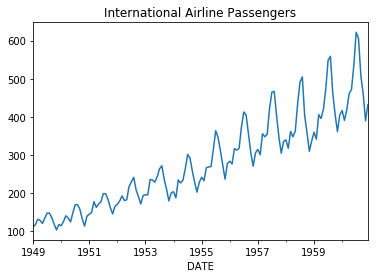

In [12]:
print(series.head())
series.plot()
plt.title('International Airline Passengers')
plt.show()

In [4]:
# SARIMA model test
# 12/03/2018

# International Airline Passengers
# dataset is the Box-Jenkins Series-G
# we talk the log, b/c it is multiplicative seasonality
data= series
df = np.log(data)

df1=df.diff(periods=1)
df1_12=df1.diff(periods=12)
df1_12.mean()     # same as SAS proc arima output
df1_12.std()      # same as SAS proc arima output
data= df1_12


my_order = (0, 1, 1)
my_seasonal_order = (0, 1, 1, 12)
number_iteration = 10


# Aim: calculate the running time
start_time = time.time()
for i in range(0,number_iteration):
    sm.tsa.statespace.SARIMAX(df, order=my_order, seasonal_order=my_seasonal_order).fit().aic
    i=i+1


time.time() - start_time

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-

7.48949122428894

In [5]:
model = sm.tsa.statespace.SARIMAX(df, order=my_order, seasonal_order=my_seasonal_order)
model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                                AIR   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                 244.686
Date:                            Mon, 12 Aug 2019   AIC                           -483.371
Time:                                    19:23:09   BIC                           -474.746
Sample:                                01-01-1949   HQIC                          -479.866
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4140      0.073     -5.666      0.000      -0.557      -0.271
ma.S.L12      -0.5518      0.097   

In [0]:
model?

In [0]:
# Two ways to make predictions

forecast_horizon1 = model_fit.forecast(12)

forecast_horizon2 = model_fit.predict(start=144, end=156)

In [0]:
# b/c we took log at the beginning
# we need to transform it back
predictions = np.exp(forecast_horizon1)

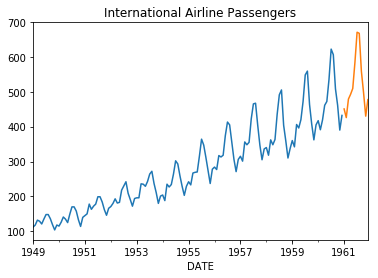

In [16]:
series_predictions= series.append(predictions)
series.plot()
predictions.plot()

plt.title('International Airline Passengers')
plt.show()

Other analysis, such as ACF, PACF, residual analysis should be mentioned in this notebook. However, the aim of it was to comparing the running time of ARIMA packages in different programming languages. Hence, they were not listed in the first version and may be added later.